In [1]:
%matplotlib inline
import os
import loompy
import logging
import pandas as pd
import numpy as np
import cytograph as cg
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import *
from sklearn.metrics.pairwise import cosine_distances
import numpy_groupies as npg
import matplotlib.pyplot as plt

## Patch loom files with latest version of Table S3

In [2]:
def patch_loom(f):
    annf = "/Users/stelin/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Revision/Table S3.xlsx"
    anns = pd.read_excel(annf)
    anns.fillna("", inplace=True)

    def make_array(values, order):
        a = np.zeros(len(order), dtype="object")
        for ix, val in enumerate(values):
            a[order == ix] = val
        return np.array(a)

    with loompy.connect(f) as ds:
        if "LeafOrder" not in ds.ca.keys():
            print("File lacks LeafOrder")
            return
        ds.ca.LeafOrder = ds.ca.LeafOrder.astype('int')
        #print(ds.ca.LeafOrder)
        #print(make_array(anns["Cluster name"], ds.ca.LeafOrder-1))
        #print(np.unique(ds.ca.ClusterName[ds.ca.TaxonomyRank4 == "Dentate gyrus granule neurons"]))
        #print(ds[ds.ra.Gene == "Mpz", :][:, ds.ca.LeafOrder == 240])
        ds.ca.ClusterName = make_array(anns["Cluster name"], ds.ca.LeafOrder.astype('int')-1)
        ds.ca.Description = make_array(anns["Description"], ds.ca.LeafOrder.astype('int')-1)
        ds.ca.Comment = make_array(anns["Comment"], ds.ca.LeafOrder.astype('int')-1)
        ds.ca.Region = make_array(anns["Region"], ds.ca.LeafOrder.astype('int')-1)
        ds.ca.Developmental_compartment = make_array(anns["Developmental compartment"], ds.ca.LeafOrder.astype('int')-1)
        ds.ca.Neurotransmitter = make_array(anns["Neurotransmitter"], ds.ca.LeafOrder.astype('int')-1)
        ds.ca.Probable_location = make_array(anns["Probable location (manually assigned)"], ds.ca.LeafOrder.astype('int')-1)
        #ds.ca.Location_based_on = make_array(anns["Location based on"], ds.ca.LeafOrder.astype('int')-1)

In [7]:
patch_loom("/Users/stelin/build_20171205/L5_All.agg.loom")

In [11]:
d = "/Users/stelin/build_20171205/"
for f in os.listdir(d):
    if f.startswith("L6") and f.endswith(".loom"):
        print(f)
        patch_loom(d + f)

L6_R3_(Oligodendrocytes).agg.loom
L6_R4_(Peripheral sensory peptidergic neurons).loom
L6_R3_(Astroependymal cells).loom
L6_R2_(CNS neurons).loom
L6_R4_(Satellite glia).loom
L6_R4_(Cholinergic and monoaminergic neurons).agg.loom
L6_R3_(Telencephalon interneurons).loom
L6_R3_(Hindbrain neurons).loom
L6_R1.loom
L6_R4_(Vascular endothelial cells).agg.loom
L6_R3_(Enteric neurons).loom
L6_R4_(Peptidergic neurons).agg.loom
L6_R4_(Telencephalon inhibitory interneurons).agg.loom
L6_R4_(Vascular smooth muscle cells).agg.loom
L6_R3_(Astroependymal cells).agg.loom
L6_R2_(CNS glia).loom
L6_R4_(Non-glutamatergic neuroblasts).agg.loom
L6_R4_(Telencephalon projecting excitatory neurons).loom
L6_R2_(PNS neurons).agg.loom
L6_R4_(Sympathetic noradrenergic neurons).agg.loom
L6_R4.agg.loom
File lacks LeafOrder
L6_R3_(Hindbrain neurons).agg.loom
L6_R3_(Telencephalon projecting neurons).loom
L6_R4_(Enteric neurons).loom
L6_R2_(CNS neurons).agg.loom
L6_R3_(Peripheral sensory neurons).agg.loom
L6_R3_(Oligodend

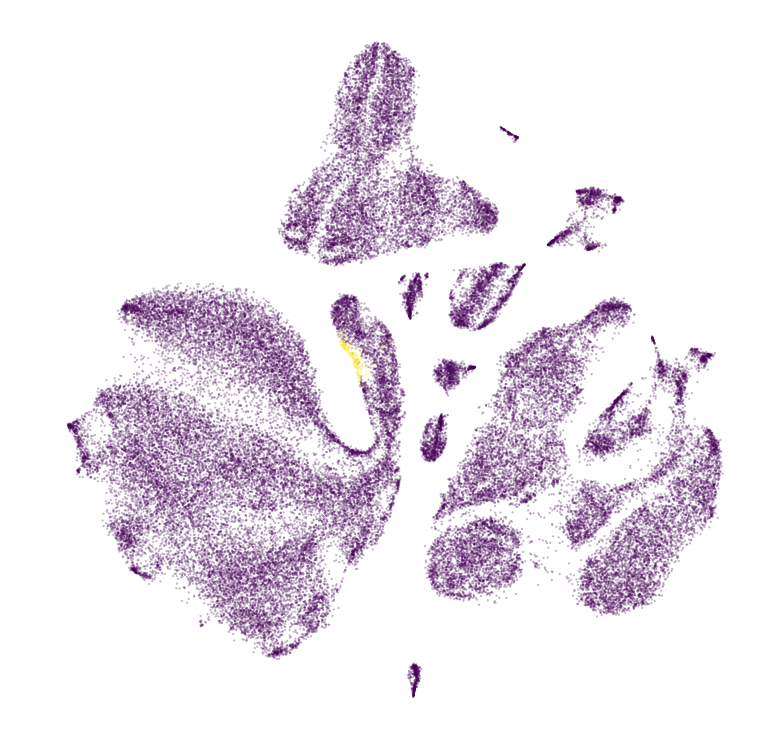

In [136]:
with loompy.connect("/Users/sten/build_20171205/L6_R1_(Glia).loom") as ds:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    plt.scatter(x=ds.ca._X, y=ds.ca._Y, s=20,c=(ds.ca.ClusterName=="COP2"), marker='.', alpha=0.3, lw=0)
    data = ds[:10*np.unique(ds.ca.ClusterName).shape[0], :]


## Replot all the heatmaps

In [137]:
"L6_Enteric.loom"[:-6]

'L6_Enteri'

In [12]:
d = "/Users/stelin/build_20171205/"
for f in os.listdir(d):
    if f.startswith("L6") and f.endswith(".loom") and not f.endswith(".agg.loom"):
        print(f)
        if os.path.exists(d + f[:-5] + ".agg.loom"):
            hmf = d + f[:-5] + "_exported/" + f[:-5] + "_heatmap.pdf"
            with loompy.connect(d + f) as ds:
                with loompy.connect(d + f[:-5] + ".agg.loom") as dsagg:
                    cg.plot_markerheatmap(ds, dsagg, out_file=hmf)
        else:
            print("No .agg.loom file for " + f)

2018-04-04 11:09:09,723 INFO: (27998, 565)


L6_R4_(Peripheral sensory peptidergic neurons).loom


2018-04-04 11:09:13,350 INFO: (27998, 22286)


L6_R3_(Astroependymal cells).loom


2018-04-04 11:09:20,542 INFO: (27998, 70968)


L6_R2_(CNS neurons).loom


2018-04-04 11:10:07,508 INFO: (27998, 684)


L6_R4_(Satellite glia).loom


2018-04-04 11:10:10,625 INFO: (27998, 13828)


L6_R3_(Telencephalon interneurons).loom


2018-04-04 11:10:18,197 INFO: (27998, 1144)


L6_R3_(Hindbrain neurons).loom


2018-04-04 11:10:22,268 INFO: (27998, 160796)


L6_R1.loom


2018-04-04 11:10:47,624 INFO: (27998, 1105)


L6_R3_(Enteric neurons).loom


2018-04-04 11:10:51,582 INFO: (27998, 52539)


L6_R2_(CNS glia).loom


2018-04-04 11:11:02,756 INFO: (27998, 18799)


L6_R4_(Telencephalon projecting excitatory neurons).loom


2018-04-04 11:11:09,418 INFO: (27998, 28858)


L6_R3_(Telencephalon projecting neurons).loom


2018-04-04 11:11:19,873 INFO: (27998, 1105)


L6_R4_(Enteric neurons).loom


2018-04-04 11:11:24,463 INFO: (27998, 30253)


L6_R3_(Oligodendrocytes).loom


2018-04-04 11:11:31,309 INFO: (27998, 644)


L6_R4_(Oligodendrocyte precursor cells).loom
No .agg.loom file for L6_R4_(Oligodendrocyte precursor cells).loom
L6_R4_(Glutamatergic neuroblasts).loom


2018-04-04 11:11:34,588 INFO: (27998, 796)


L6_R4_(Sympathetic noradrenergic neurons).loom


2018-04-04 11:11:39,382 INFO: (27998, 1580)


L6_R3_(Peripheral sensory neurons).loom


2018-04-04 11:11:43,927 INFO: (27998, 886)


L6_R3_(Sympathetic neurons).loom


2018-04-04 11:11:47,482 INFO: (27998, 2029)


L6_R4_(Perivascular macrophages).loom


2018-04-04 11:11:51,353 INFO: (27998, 12147)


L6_R2_(Vascular cells).loom


2018-04-04 11:11:57,656 INFO: (27998, 5466)


L6_R3_(Immature neural).loom


2018-04-04 11:12:05,212 INFO: (27998, 10535)


L6_R4_(Enteric glia).loom


2018-04-04 11:12:09,506 INFO: (27998, 3977)


L6_R3_(Cholinergic, monoaminergic and peptidergic neurons).loom


2018-04-04 11:12:15,924 INFO: (27998, 5292)


L6_R4_(Cerebellum neurons).loom


2018-04-04 11:12:19,920 INFO: (27998, 889)


L6_R4_(Peripheral sensory non-peptidergic neurons).loom


2018-04-04 11:12:23,267 INFO: (27998, 1166)


L6_R4_(Spinal cord excitatory neurons).loom


2018-04-04 11:12:28,517 INFO: (27998, 1628)


L6_R4_(Vascular smooth muscle cells).loom


2018-04-04 11:12:32,397 INFO: (27998, 1501)


L6_R4_(Vascular and leptomeningeal cells).loom


2018-04-04 11:12:36,235 INFO: (27998, 3571)


L6_R2_(PNS neurons).loom


2018-04-04 11:12:42,541 INFO: (27998, 4822)


L6_R4_(Non-glutamatergic neuroblasts).loom


2018-04-04 11:12:47,015 INFO: (27998, 1922)


L6_R3_(Spinal cord neurons).loom


2018-04-04 11:12:51,752 INFO: (27998, 30253)


L6_R4_(Oligodendrocytes).loom


2018-04-04 11:13:00,007 INFO: (27998, 4026)


L6_R4_(Di- and mesencephalon inhibitory neurons).loom


2018-04-04 11:13:04,594 INFO: (27998, 4368)


L6_R4_(Dentate gyrus granule neurons).loom


2018-04-04 11:13:08,321 INFO: (27998, 1257)


L6_R4_(Ependymal cells).loom


2018-04-04 11:13:12,176 INFO: (27998, 2906)


L6_R4_(Olfactory ensheathing cells).loom
No .agg.loom file for L6_R4_(Olfactory ensheathing cells).loom
L6_R4_(Peptidergic neurons).loom


2018-04-04 11:13:16,886 INFO: (27998, 66656)


L6_R1_(Glia).loom


2018-04-04 11:13:32,305 INFO: (27998, 5292)


L6_R3_(Cerebellum neurons).loom


2018-04-04 11:13:36,383 INFO: (27998, 14117)


L6_R4_(Subventricular zone radial glia-like cells).loom
No .agg.loom file for L6_R4_(Subventricular zone radial glia-like cells).loom
L6_R3_(Neural crest-like glia).loom


2018-04-04 11:13:43,666 INFO: (27998, 5213)


L6_R4_(Pericytes).loom


2018-04-04 11:13:50,257 INFO: (27998, 6455)


L6_R4_(Di- and mesencephalon excitatory neurons).loom


2018-04-04 11:13:55,993 INFO: (27998, 5425)


L6_R4_(Microglia).loom


2018-04-04 11:14:00,306 INFO: (27998, 74539)


L6_R1_(Neurons).loom


2018-04-04 11:15:03,149 INFO: (27998, 756)


L6_R4_(Spinal cord inhibitory neurons).loom


2018-04-04 11:15:07,001 INFO: (27998, 19377)


L6_R4_(Astrocytes).loom


2018-04-04 11:15:12,662 INFO: (27998, 1144)


L6_R4_(Hindbrain neurons).loom


2018-04-04 11:15:16,816 INFO: (27998, 3805)


L6_R4_(Vascular endothelial cells).loom


2018-04-04 11:15:21,033 INFO: (27998, 160796)


L6_R4.loom


2018-04-04 11:15:51,932 INFO: (27998, 1071)


L6_R4_(Cholinergic and monoaminergic neurons).loom


2018-04-04 11:15:56,775 INFO: (27998, 5191)


L6_R4_(Olfactory inhibitory neurons).loom


2018-04-04 11:16:01,015 INFO: (27998, 160796)


L6_R3.loom


2018-04-04 11:16:21,417 INFO: (27998, 10481)


L6_R3_(Di- and mesencephalon neurons).loom


2018-04-04 11:16:28,717 INFO: (27998, 8637)


L6_R4_(Telencephalon inhibitory interneurons).loom


2018-04-04 11:16:34,102 INFO: (27998, 14117)


L6_R4_(Choroid epithelial cells).loom
No .agg.loom file for L6_R4_(Choroid epithelial cells).loom
L6_R2_(Neural crest-like glia).loom


2018-04-04 11:16:41,106 INFO: (27998, 12147)


L6_R3_(Vascular cells).loom


2018-04-04 11:16:47,375 INFO: (27998, 5691)


L6_R4_(Telencephalon projecting inhibitory neurons).loom


2018-04-04 11:16:51,210 INFO: (27998, 160796)


L6_R2.loom


2018-04-04 11:17:10,129 INFO: (27998, 14908)


L6_R1_(Immune cells).loom


2018-04-04 11:17:15,766 INFO: (27998, 14908)


L6_R2_(Immune cells).loom


2018-04-04 11:17:25,217 INFO: (27998, 12147)


L6_R1_(Vascular cells).loom


2018-04-04 11:17:31,493 INFO: (27998, 14908)


L6_R3_(Immune cells).loom


In [17]:
d = "/Users/stelin/build_20171205/"
for f in os.listdir(d):
    if f.startswith("L6_R4") and f.endswith(".loom") and not f.endswith(".agg.loom"):
        print(f)
        if not os.path.exists(d + f[:-5] + "_exported/"):
            print(d + f[:-5] + "_exported/ not found.")
            continue
        hmf = d + f[:-5] + "_exported/" + f[:-5] + "_pretty.png"
        with loompy.connect(d + f) as ds:
            size = 100000 / ds.shape[1]
            fig = plt.figure(figsize=(3,3))
            ax = fig.add_axes([0, 0, 1, 1])
            ax.axis('off')
            ix = 0
            colors = cg.colorize(np.unique(ds.ca.ClusterName))
            for cluster in np.unique(ds.ca.ClusterName):
                cells = ds.ca.ClusterName == cluster
                plt.scatter(x=ds.ca._X[cells], y=ds.ca._Y[cells], s=size, c=colors[ix, :], marker='.', label=cluster, alpha=0.5, lw=0)
                ix += 1
            lgnd = ax.legend(fontsize=10, labelspacing=0.2, loc="upper left", bbox_to_anchor=(1, 1),frameon=False)
            for handle in lgnd.legendHandles:
                handle.set_sizes([250])
                handle.set_alpha(1)
            plt.savefig(hmf, dpi=600, transparent=True, bbox_extra_artists=(lgnd,), bbox_inches='tight')
            plt.close()        


L6_R4_(Peripheral sensory peptidergic neurons).loom
L6_R4_(Satellite glia).loom
L6_R4_(Telencephalon projecting excitatory neurons).loom
L6_R4_(Enteric neurons).loom
L6_R4_(Oligodendrocyte precursor cells).loom
/Users/stelin/build_20171205/L6_R4_(Oligodendrocyte precursor cells)_exported/ not found.
L6_R4_(Glutamatergic neuroblasts).loom
L6_R4_(Sympathetic noradrenergic neurons).loom
L6_R4_(Perivascular macrophages).loom
L6_R4_(Enteric glia).loom
L6_R4_(Cerebellum neurons).loom
L6_R4_(Peripheral sensory non-peptidergic neurons).loom
L6_R4_(Spinal cord excitatory neurons).loom
L6_R4_(Vascular smooth muscle cells).loom
L6_R4_(Vascular and leptomeningeal cells).loom
L6_R4_(Non-glutamatergic neuroblasts).loom
L6_R4_(Oligodendrocytes).loom
L6_R4_(Di- and mesencephalon inhibitory neurons).loom
L6_R4_(Dentate gyrus granule neurons).loom
L6_R4_(Ependymal cells).loom
L6_R4_(Olfactory ensheathing cells).loom
/Users/stelin/build_20171205/L6_R4_(Olfactory ensheathing cells)_exported/ not found.
L6

In [13]:
with loompy.connect("/Users/stelin/build_20171205/L6_R3_(Enteric neurons).agg.loom") as ds:
    print(ds.ca.Description[ds.ca.ClusterName == "ENT7"])

['Cholinergic enteric neurons, VGLUT2']
